In [49]:
# All imports needed for processing the dataset
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from itertools import product
import itertools
%matplotlib inline

In [4]:
#Unpack tgz file provided
tar = tarfile.open("keras_example (2).tgz", "r:gz")
tar.extractall("./SVM Data")
tar.close()

In [5]:
#Read data file into data frame variable using pandas
df = pd.read_csv(r"C:\Users\joeod\Downloads\SVM Data\keras_example\pima-indians-diabetes.data.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#Read in Names fie in order to provide context to data
with open(r"C:\Users\joeod\Downloads\SVM Data\keras_example\pima-indians-diabetes.names") as f:
    print(f.read())

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [8]:
#Now that the data has context, name headings in the data frame
df.columns = ['Pregnancies', 'Glucose Concentration', 'Blood pressure', 'Skin fold thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Class']
df

,Pregnancies,Glucose Concentration,Blood pressure,Skin fold thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#View summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose Concentration       768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin fold thickness         768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5,1,'Age (years)')

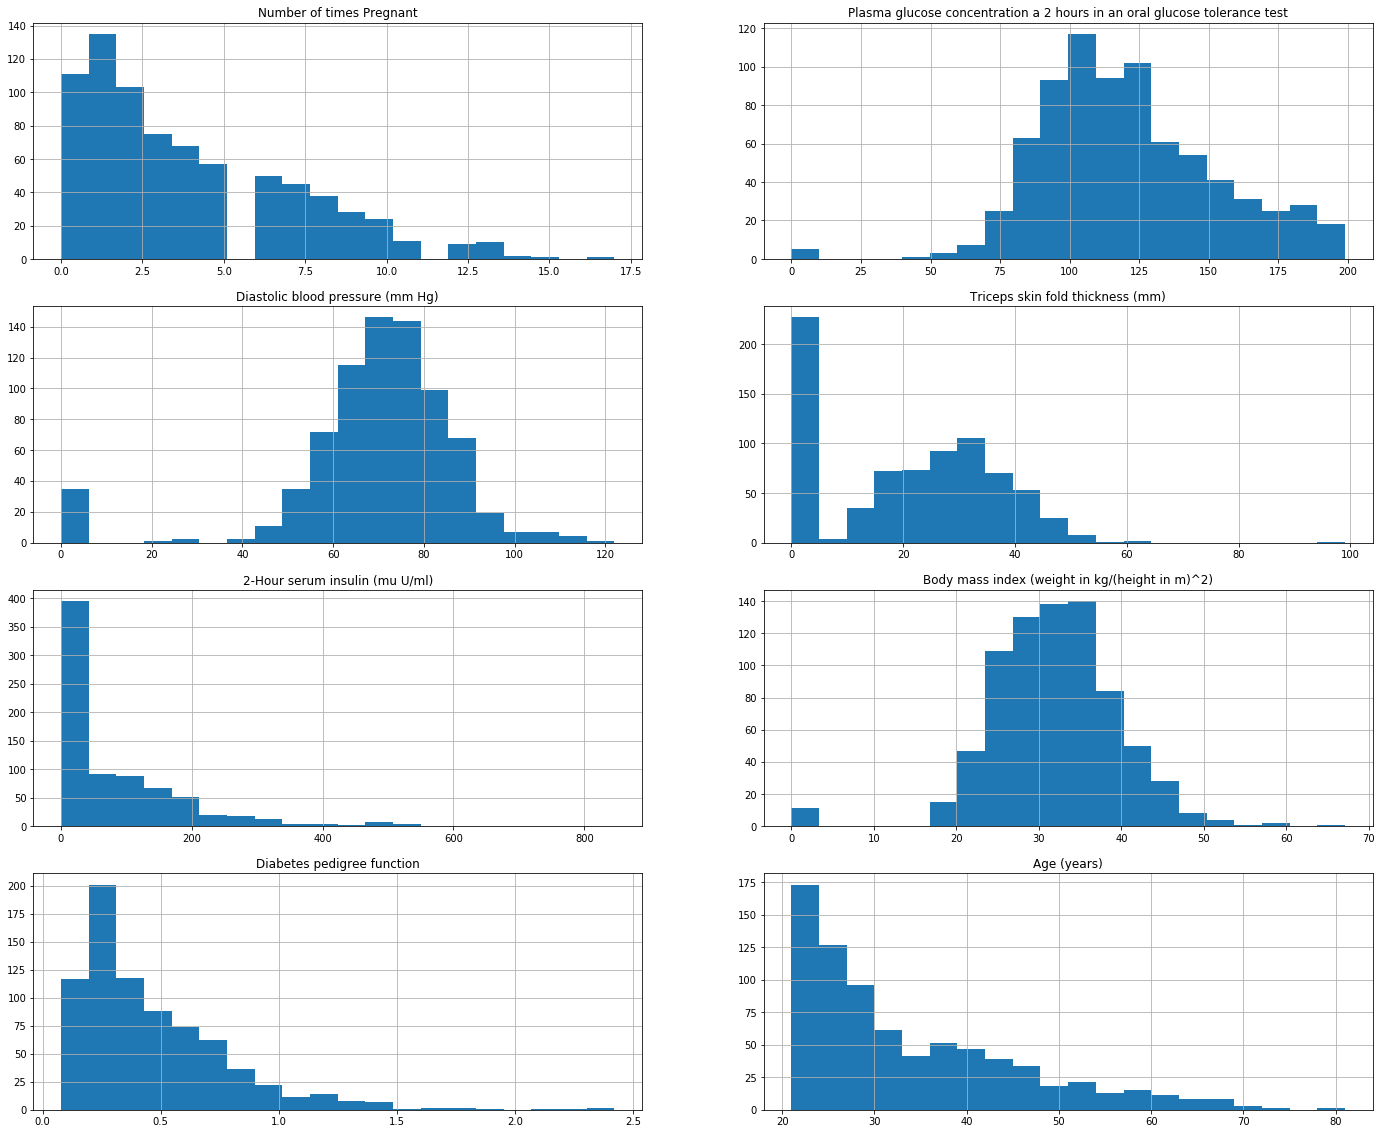

In [13]:
#View the distribution of the non-binary attributes using histograms
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df['Pregnancies'].hist(bins=20)
fig.set_title('Number of times Pregnant')

plt.subplot(4, 2, 2)
fig = df['Glucose Concentration'].hist(bins=20)
fig.set_title('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')

plt.subplot(4, 2, 3)
fig = df['Blood pressure'].hist(bins=20)
fig.set_title('Diastolic blood pressure (mm Hg)')

plt.subplot(4, 2, 4)
fig = df['Skin fold thickness'].hist(bins=20)
fig.set_title('Triceps skin fold thickness (mm)')

plt.subplot(4, 2, 5)
fig = df['Insulin'].hist(bins=20)
fig.set_title('2-Hour serum insulin (mu U/ml)')

plt.subplot(4, 2, 6)
fig = df['BMI'].hist(bins=20)
fig.set_title('Body mass index (weight in kg/(height in m)^2)')

plt.subplot(4, 2, 7)
fig = df['Diabetes Pedigree Function'].hist(bins=20)
fig.set_title('Diabetes pedigree function')

plt.subplot(4, 2, 8)
fig = df['Age'].hist(bins=20)
fig.set_title('Age (years)')


In [29]:
#Separate binary and non-binary values in dataset
X = df.iloc[:,0:8]
y = df.iloc[:,8]
print(X)
print(y)

     Pregnancies  Glucose Concentration  Blood pressure  Skin fold thickness  \
0              6                    148              72                   35   
1              1                     85              66                   29   
2              8                    183              64                    0   
3              1                     89              66                   23   
4              0                    137              40                   35   
..           ...                    ...             ...                  ...   
763           10                    101              76                   48   
764            2                    122              70                   27   
765            5                    121              72                   23   
766            1                    126              60                    0   
767            1                     93              70                   31   

     Insulin   BMI  Diabetes Pedigree F

In [30]:
#Split data into train data (used to fit machine learning model) and test data (used to evaluate the fit of the machine learning model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Test size = Proportion of dataset included in test split
#random_state = Controls the shuffling applied to the data before applying the split. 0 for random_state ensures the same results each time the code is executed

In [31]:
#See array shapes of X_train and X_test
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [32]:
cols = X_train.columns #Defines amount of columns cols same as that of X training dat

In [33]:
scaler = StandardScaler()
#StandardScaler transforms data such that distribution will have mean 0 and s.d. 1.
X_train = scaler.fit_transform(X_train) #Scales training data, learns scaling parameters
X_test = scaler.transform(X_test) #Uses same mean and variance from training data to transform test data

In [34]:
#Puts X training and testing data into pandas data frames with amount of columns as cols defined above
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [36]:
X_train.describe() #Gives statistics of a given data set

,Pregnancies,Glucose Concentration,Blood pressure,Skin fold thickness,Insulin,BMI,Diabetes Pedigree Function,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-3.498830e-17,3.363216e-17,2.026971e-16,-3.182398e-17,-2.412113e-16,-4.383030e-16,-8.317632e-17,-3.905671e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-3.803690e+00,-3.543717e+00,-1.285816e+00,-6.996567e-01,-4.072759e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-6.888968e-01,-3.699205e-01,-1.285816e+00,-6.996567e-01,-5.951922e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-1.068395e-01,1.419821e-01,1.481486e-01,-3.844838e-01,2.444697e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,6.325306e-01,5.515042e-01,7.560247e-01,4.077076e-01,5.776962e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.425896e+00,2.701495e+00,4.886465e+00,6.506730e+00,4.412504e+00,5.867657e+00,3.948363e+00


In [39]:
svc = SVC() #Defines Support Vector Classification
svc.fit(X_train, y_train) #Fits classifier defined above to training sets
y_pred = svc.predict(X_test) #Make predictions on test set
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred))) #Prints accuracy scores

Model accuracy score with default hyperparameters: 0.7922


In [40]:
#Repeating above cell with SVC regularisation parameter C being 1000 and kernel being linear
linear_svc=SVC(kernel='linear', C=1000.0)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8182


In [41]:
y_pred_train = linear_svc.predict(X_train) #Classifies training data
y_pred_train

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train))) #Predicts accuracy with which training data is classified

Training-set accuracy score: 0.7655


In [44]:
#Prints mean accuracies of test and training
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7655
Test set score: 0.8182


In [45]:
y_test.value_counts() #Prints how many of each classification is present

0    107
1     47
Name: Class, dtype: int64

In [46]:
#Pre made function in order to plot and display a confusion matrix, a table that describes performance of a classification model
def plot_confusion_matrix(cm, classes=["0", "1"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[97 10]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



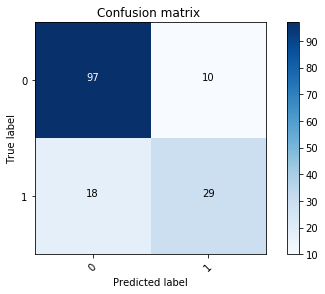

In [50]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred))